In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing all necessary libraries 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

In [ ]:
img_width, img_height = 224, 224

In [ ]:
train_data_dir = '/content/drive/My Drive/Colab Notebooks/ImageProcessing/v_data/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/ImageProcessing/v_data/test'
nb_train_samples =2400 
nb_validation_samples = 600
epochs = 5
batch_size = 100

In [ ]:
if K.image_data_format() == 'channels_first': #Returns the default image data format convention.
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [ ]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 32)      416       
                                                                 
 activation (Activation)     (None, 223, 223, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 32)      4128      
                                                                 
 activation_1 (Activation)   (None, 110, 110, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                    

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['acc']) 

In [ ]:
train_datagen = ImageDataGenerator( 
    rescale=1. / 255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255) 

In [ ]:
train_generator = train_datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 

Found 2400 images belonging to 3 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 

Found 600 images belonging to 3 classes.


In [ ]:
history = model.fit_generator( 
    train_generator, 
    steps_per_epoch=nb_train_samples // batch_size, 
    epochs=epochs, 
    validation_data=validation_generator, 
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
24/24 [==============================] - 484s 20s/step - loss: 0.6145 - acc: 0.3325 - val_loss: 0.0402 - val_acc: 0.3333
Epoch 2/5
24/24 [==============================] - 143s 6s/step - loss: -0.0494 - acc: 0.3333 - val_loss: -0.5076 - val_acc: 0.3333
Epoch 3/5
24/24 [==============================] - 143s 6s/step - loss: -1.1503 - acc: 0.3371 - val_loss: -2.8654 - val_acc: 0.3350
Epoch 4/5
24/24 [==============================] - 143s 6s/step - loss: -6.1996 - acc: 0.3533 - val_loss: -11.6885 - val_acc: 0.3333
Epoch 5/5
24/24 [==============================] - 142s 6s/step - loss: -15.7217 - acc: 0.3450 - val_loss: -39.2469 - val_acc: 0.3333


In [ ]:
model.save('model_saved.h5') 

In [ ]:
import matplotlib.pyplot as plt

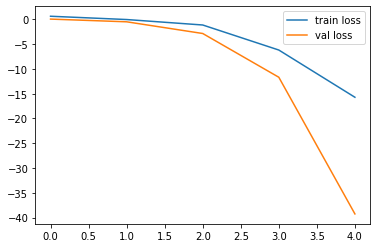

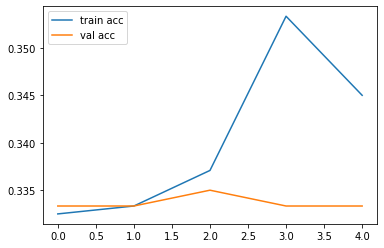

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')